## Test de las funciones

0. Imports y carga dataframe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, f_oneway, kruskal, shapiro
import toolbox_ML as ml 

In [2]:
df = pd.read_csv('./data/heart_cleveland_upload.csv')

1. describe_df

In [3]:
# Aplicar la función describe_df sobre el dataframe cargado
result = ml.describe_df(df)

# Mostrar el resultado
result


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
Tipo de Dato,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64
Porcentaje de Valores Nulos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,41,2,4,50,152,2,3,91,2,40,3,4,3,2
Porcentaje de Cardinalidad,13.804714,0.673401,1.346801,16.835017,51.178451,0.673401,1.010101,30.639731,0.673401,13.468013,1.010101,1.346801,1.010101,0.673401


2. tipifica_variables

In [4]:
ml.tipifica_variables(df, 10, 0.1)

,nombre_variable,tipo_sugerido
0,age,Numerica Continua
1,sex,Binaria
2,cp,Categórica
3,trestbps,Numerica Continua
4,chol,Numerica Continua
5,fbs,Binaria
6,restecg,Categórica
7,thalach,Numerica Continua
8,exang,Binaria
9,oldpeak,Numerica Continua


3. get_features_num_regression

In [5]:
# comprobar con el target condition
columnas_correlacionadas = ml.get_features_num_regression(df, 'condition', 0.2, None)
print(columnas_correlacionadas)

['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [6]:
# comprobar que el target no existe
ml.get_features_num_regression(df, 'condicion',0.2, None)

Error: La columna 'condicion' no está en el DataFrame.


In [7]:
# comprobar que el umbral de correlacion este entre 0 y 1
ml.get_features_num_regression(df, 'condition',2, None)

Error: El valor de 'umbral_corr' debe estar entre 0 y 1.


In [8]:
# comprobar las features que selecciona con un valor diferente de correlacion y test de hipotesis
ml.get_features_num_regression(df, 'condition',0.001, 0.9)

['chol', 'fbs']

4. plot_features_num_regression

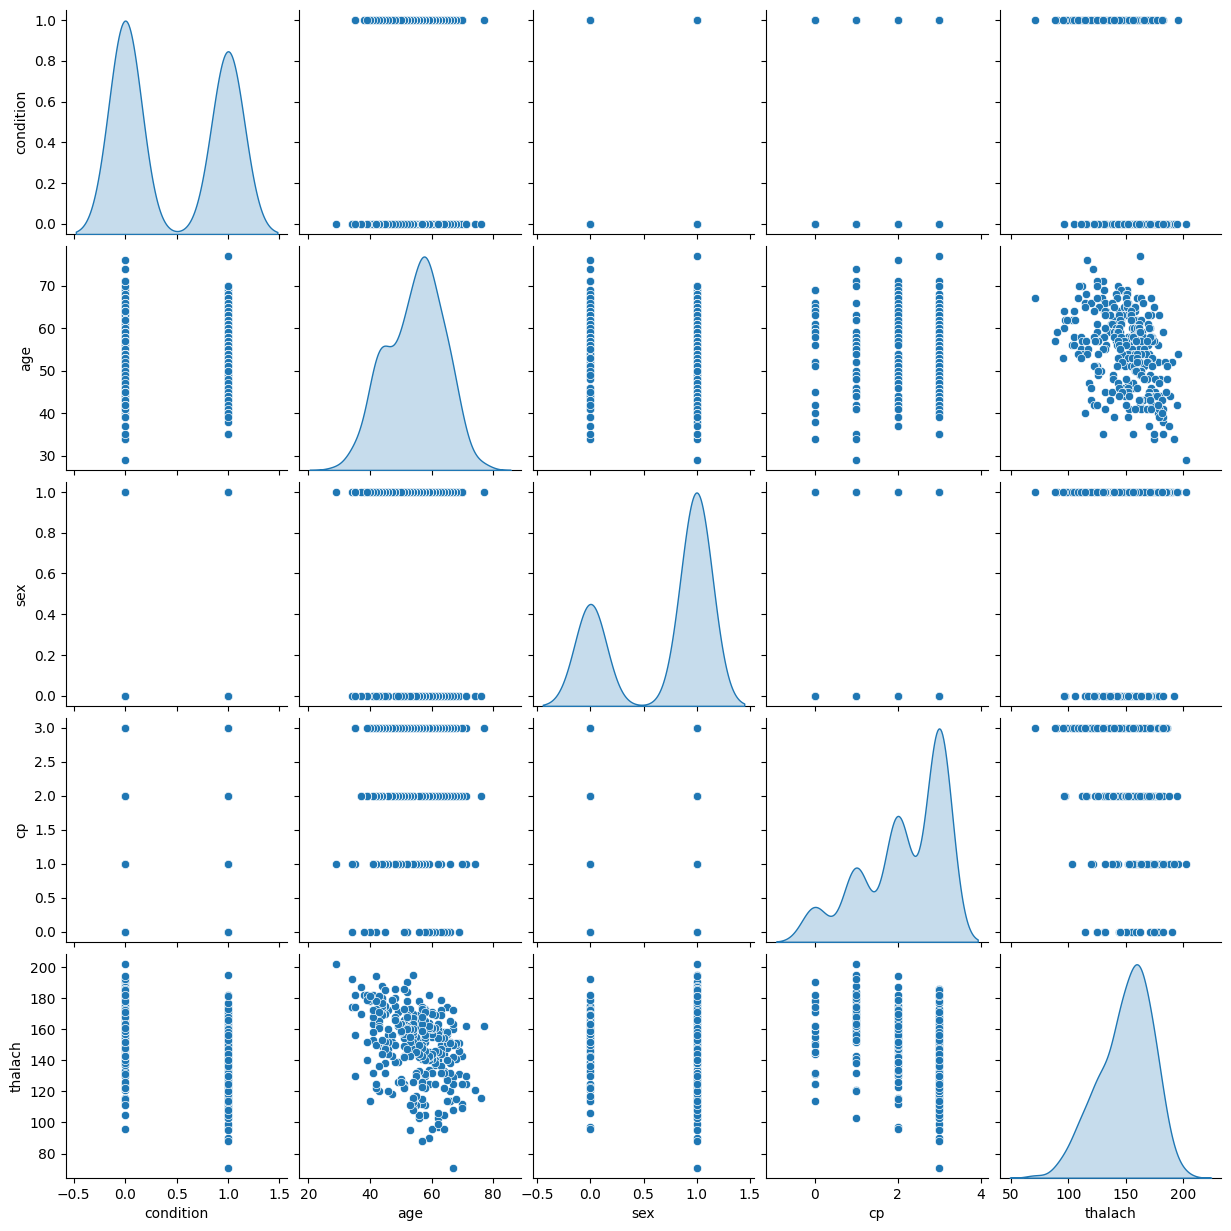

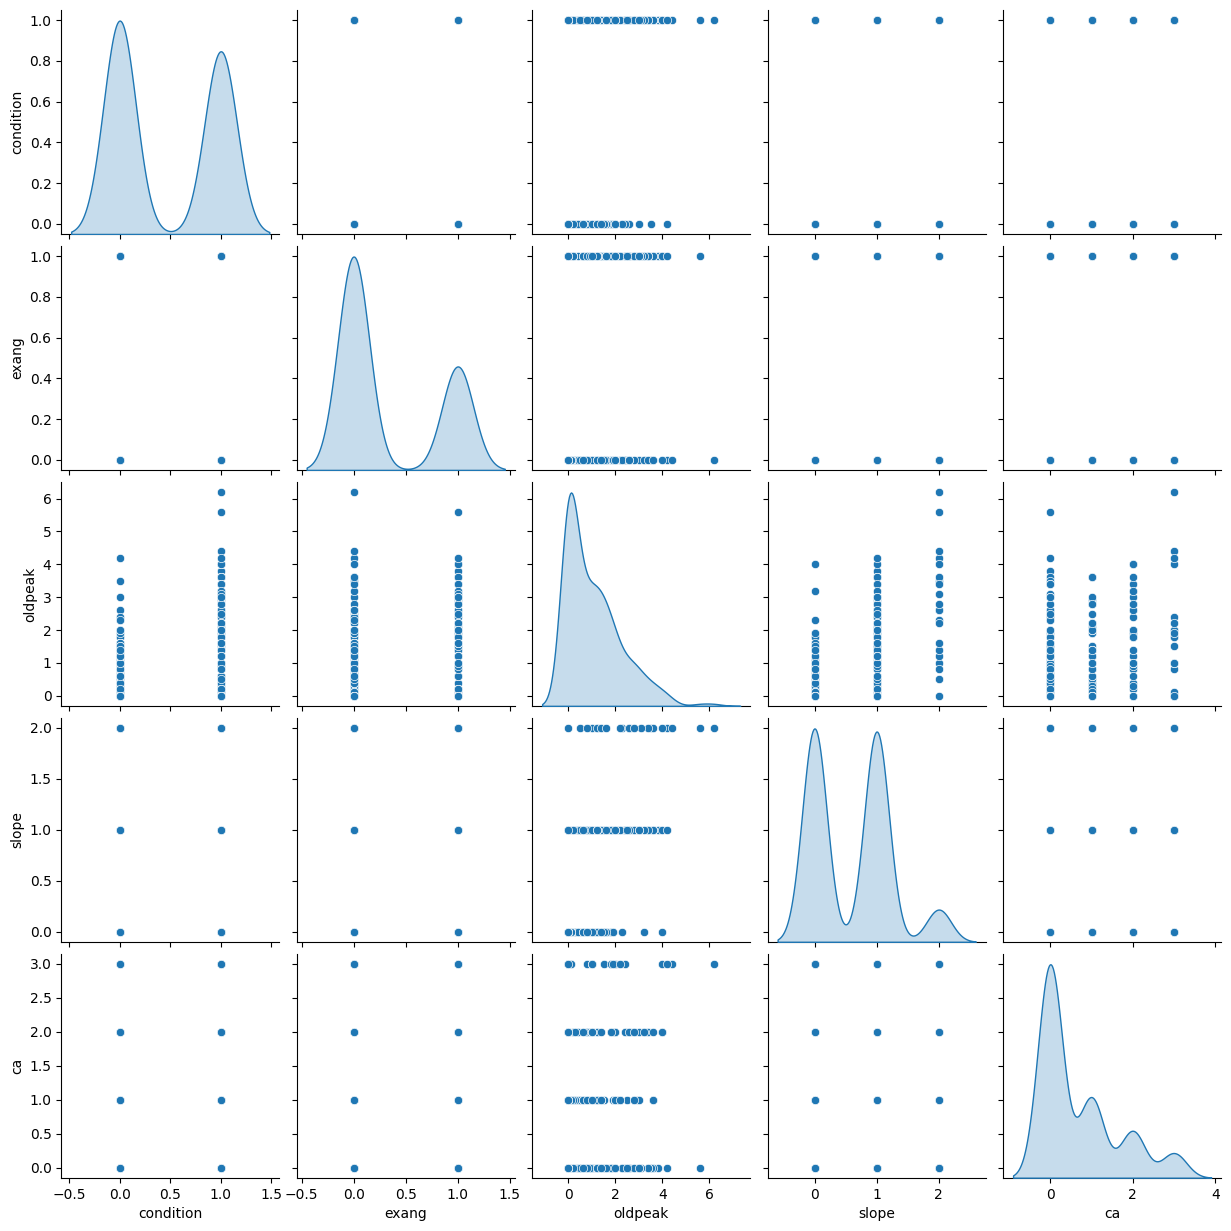

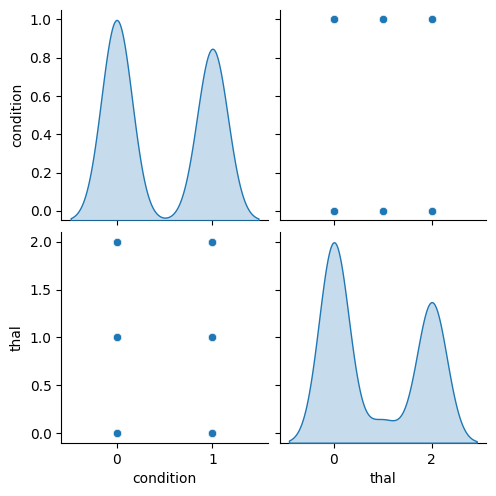

['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [9]:
ml.plot_features_num_regression(df, target_col="condition",umbral_corr=0.2)

5. get_features_cat_regression

In [10]:
# Convertir la columnas a categórica str utilizando map
df['sex'] = df['sex'].map({0: 'Male', 1: 'Female'})
df['cp'] = df['cp'].map({0: 'Angina Típica', 1: 'Angina atípica', 2:'Sin dolor de angina', 3:'Asintomático'})
df['slope'] = df['slope'].map({0: 'Sloping', 1: 'Flat', 2: 'Down'})
df['thal'] = df['thal'].map({0: 'NULL', 1: 'normal blood flow',
                             2: 'fixed defect', 3: 'reversible defect'})


df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,Female,Angina Típica,160,234,1,2,131,0,0.1,Flat,1,NULL,0
1,69,Male,Angina Típica,140,239,0,0,151,0,1.8,Sloping,2,NULL,0
2,66,Male,Angina Típica,150,226,0,0,114,0,2.6,Down,0,NULL,0
3,65,Female,Angina Típica,138,282,1,2,174,0,1.4,Flat,1,NULL,1
4,64,Female,Angina Típica,110,211,0,2,144,1,1.8,Flat,0,NULL,0


In [11]:
ml.get_features_cat_regression(df, target_col='condition', pvalue=0.05)

['sex', 'cp', 'slope', 'thal']

In [12]:
ml.get_features_cat_regression(df, target_col='condicion', pvalue=0.05)

Error: 'condicion' debe ser una columna numérica en el DataFrame.


6. plot_features_cat_regression

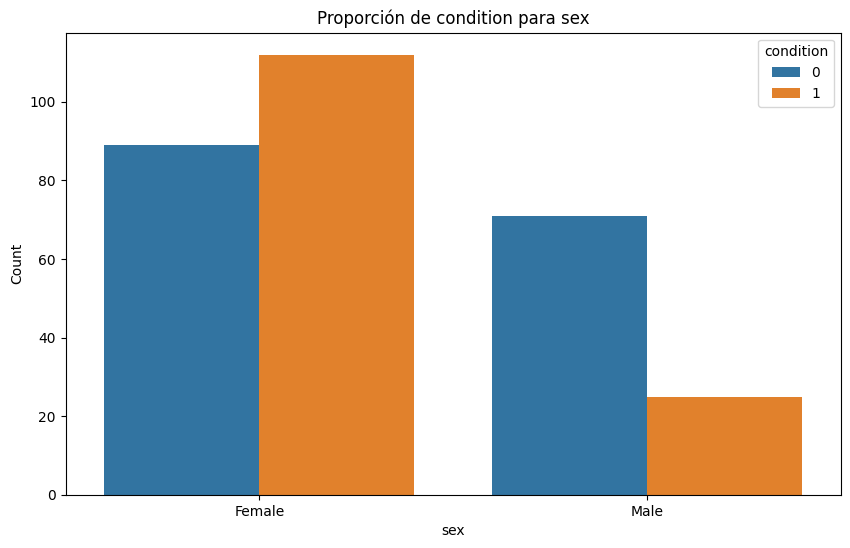

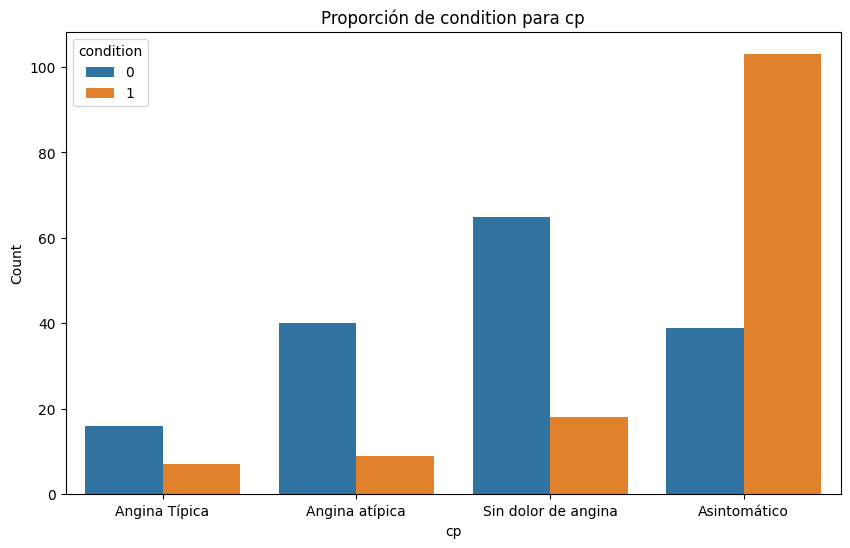

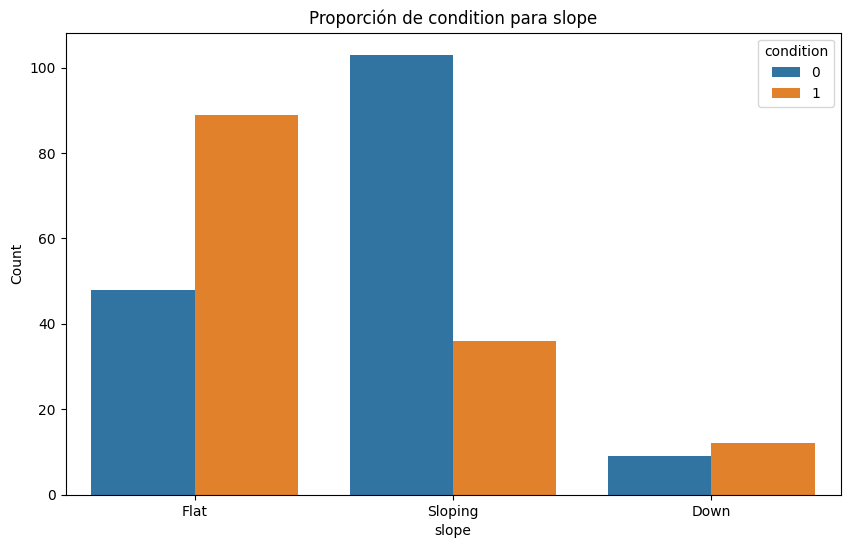

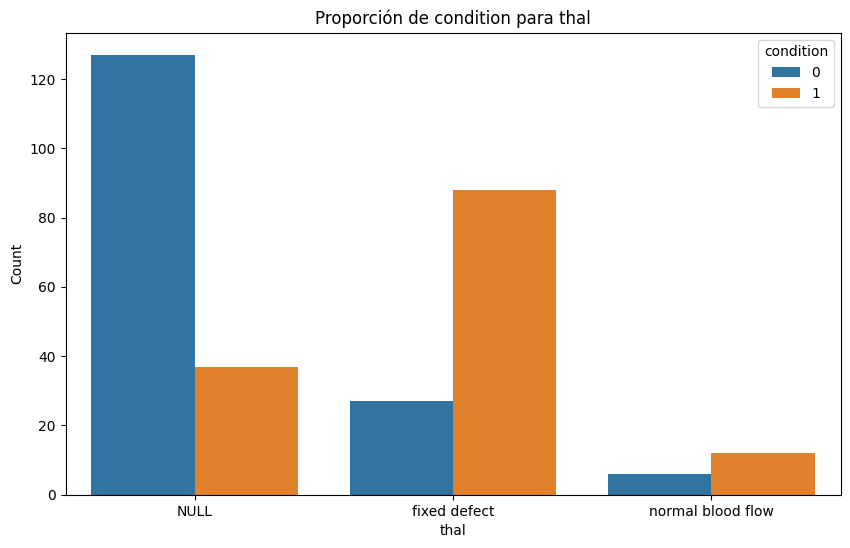

['sex', 'cp', 'slope', 'thal']

In [13]:
ml.plot_features_cat_regression(df, target_col="condition")

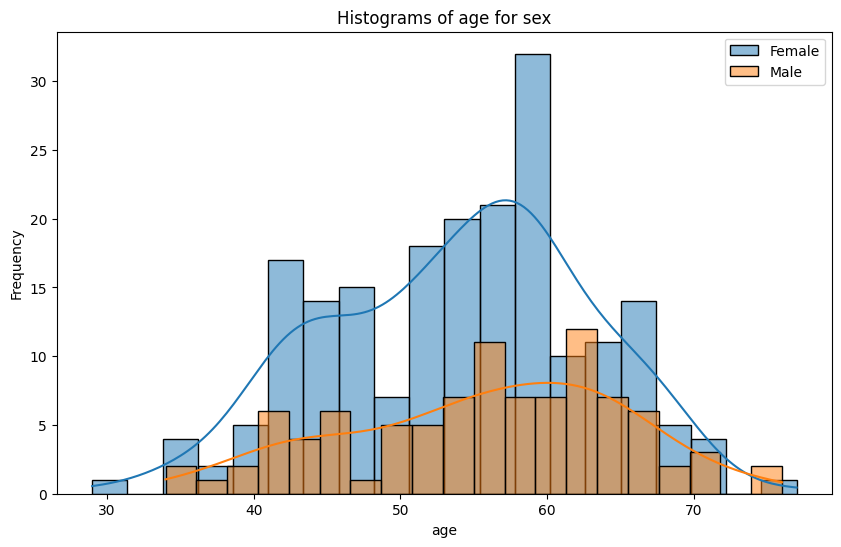

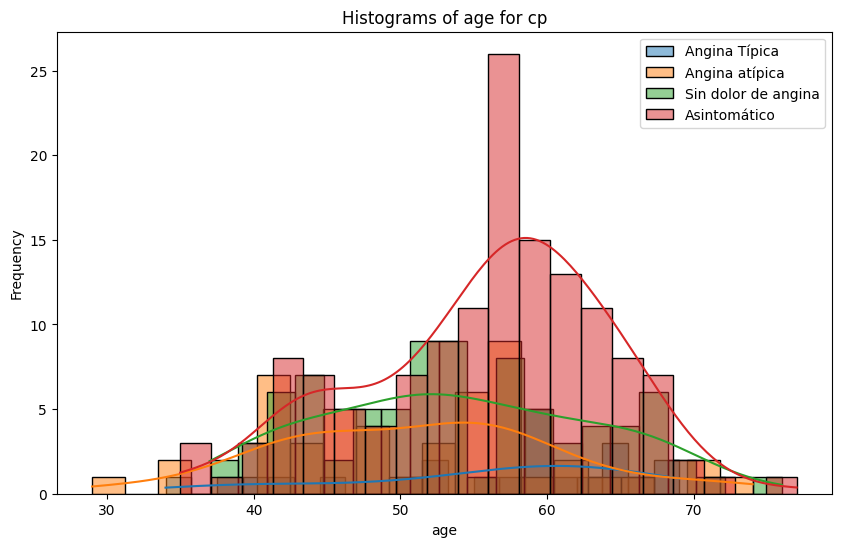

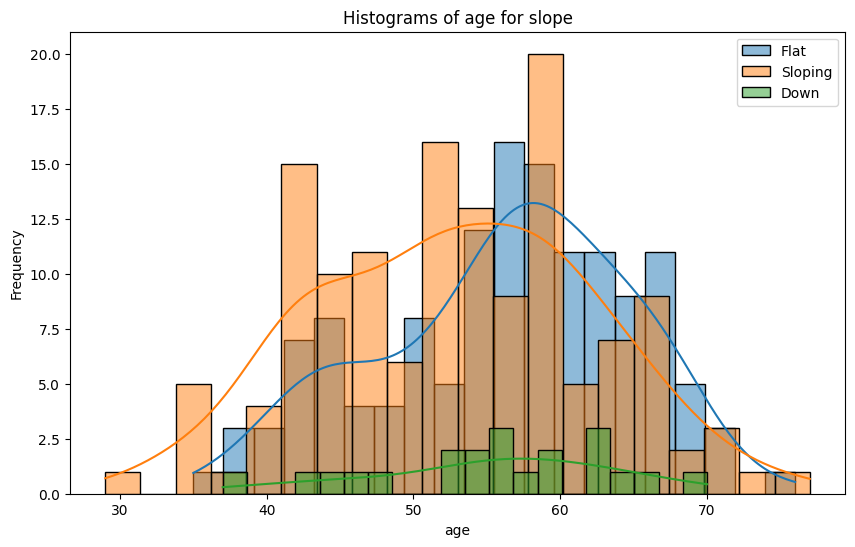

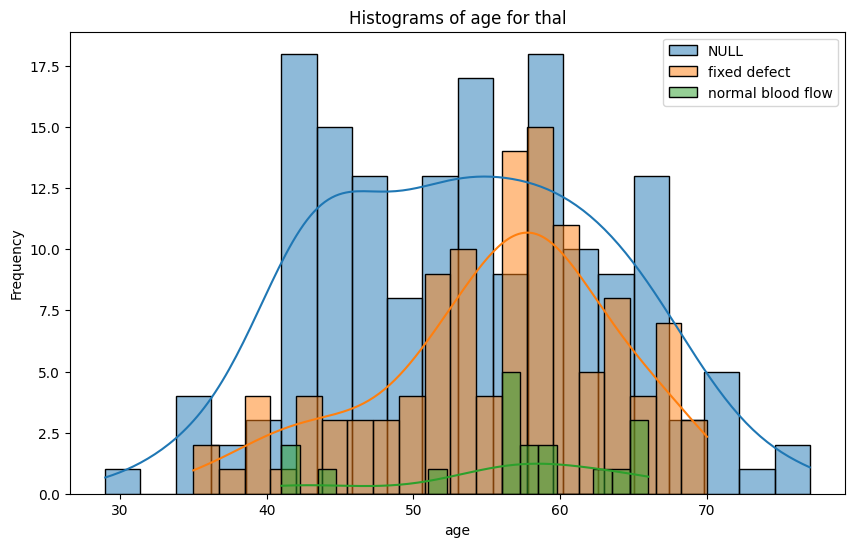

['cp', 'slope']

In [14]:
ml.plot_features_cat_regression(df, target_col="age")

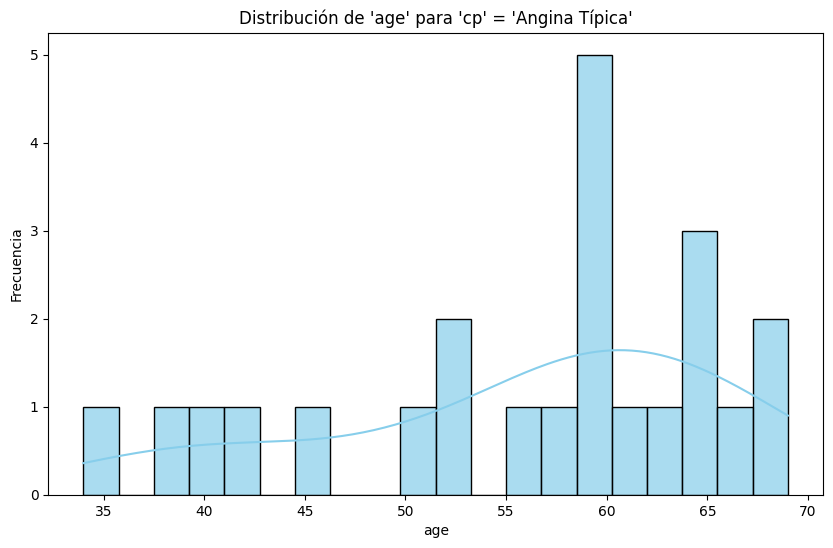

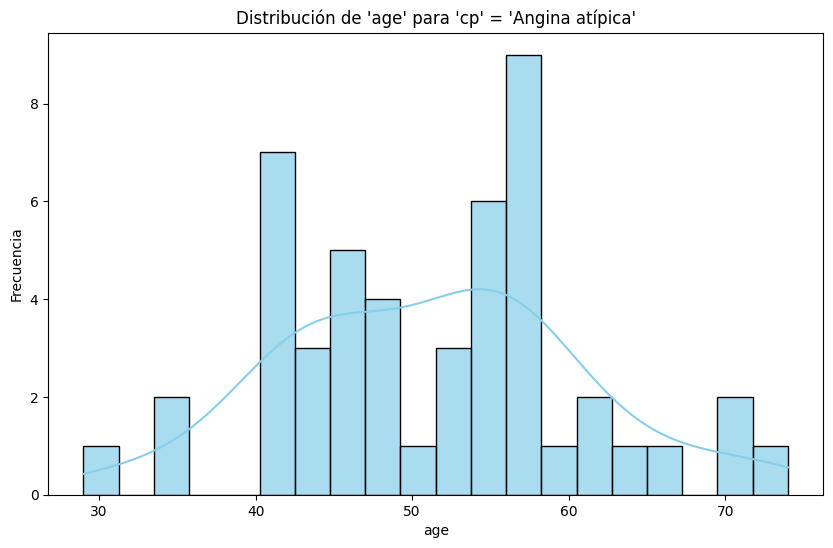

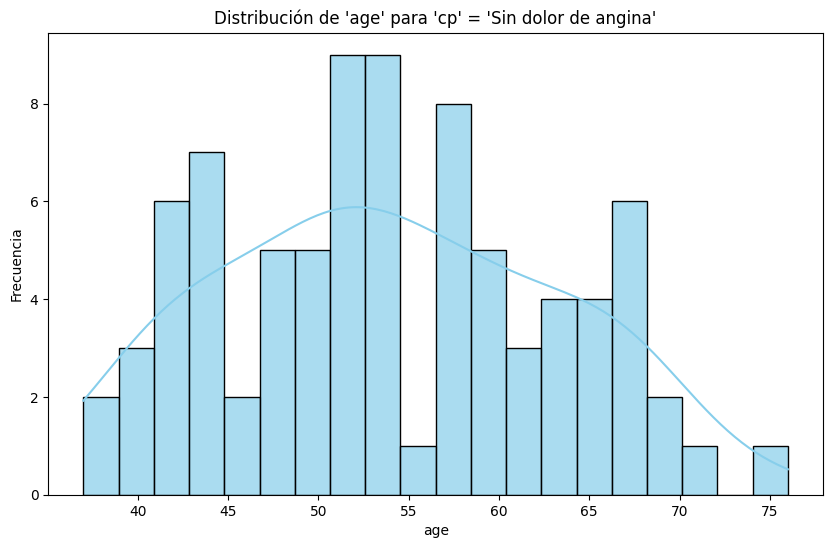

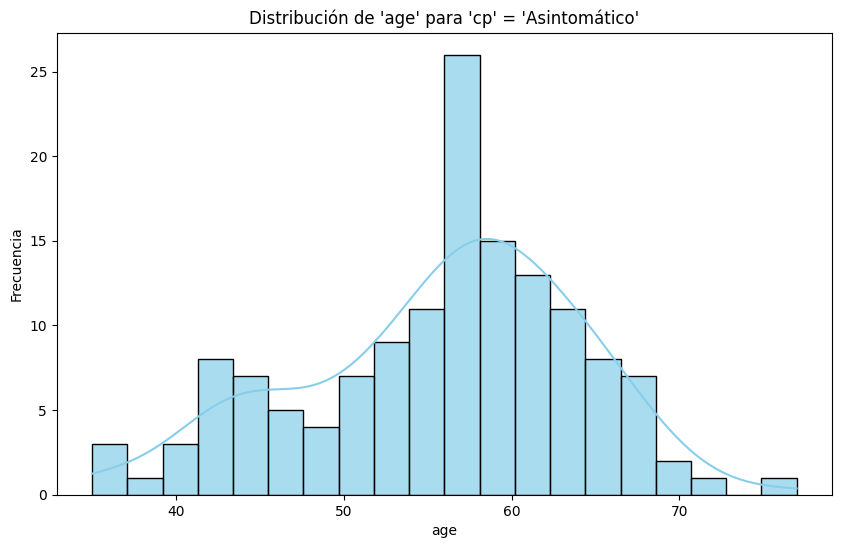

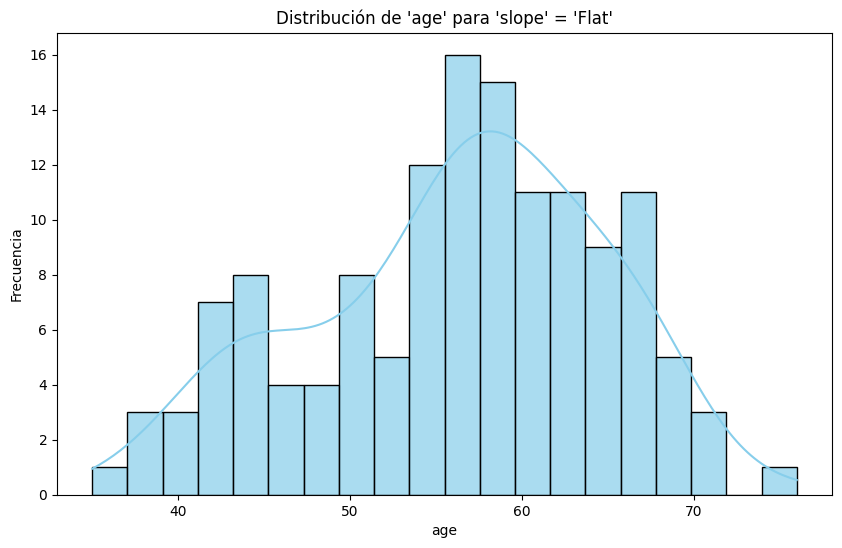

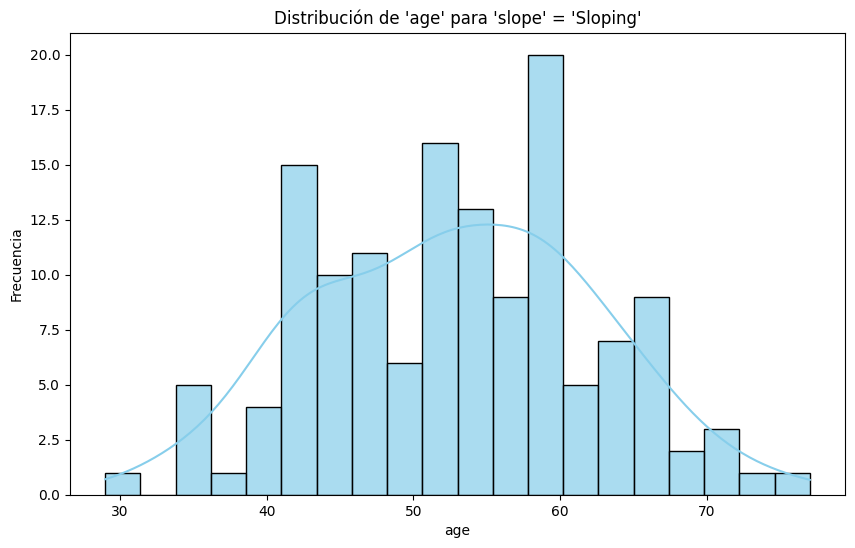

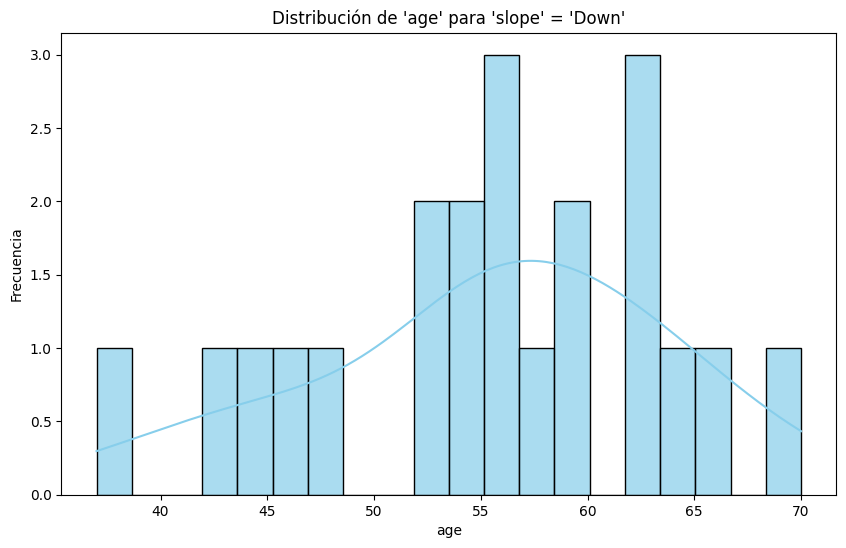

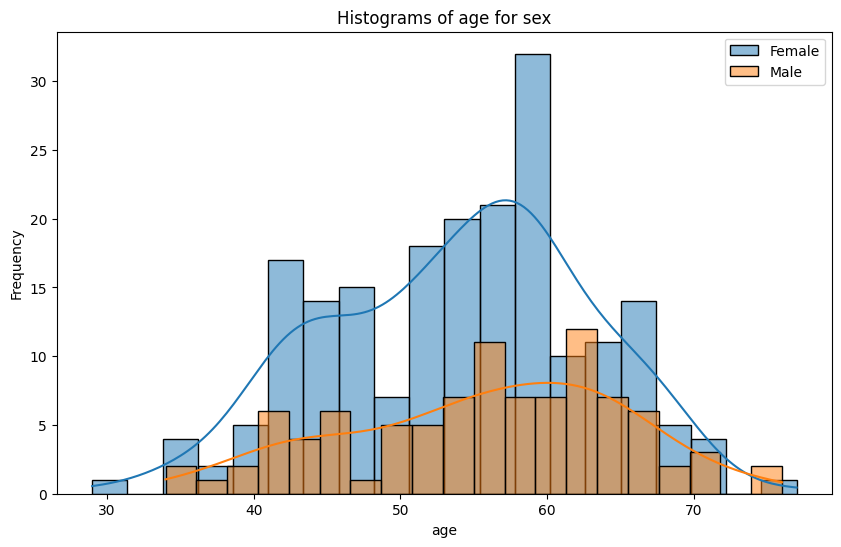

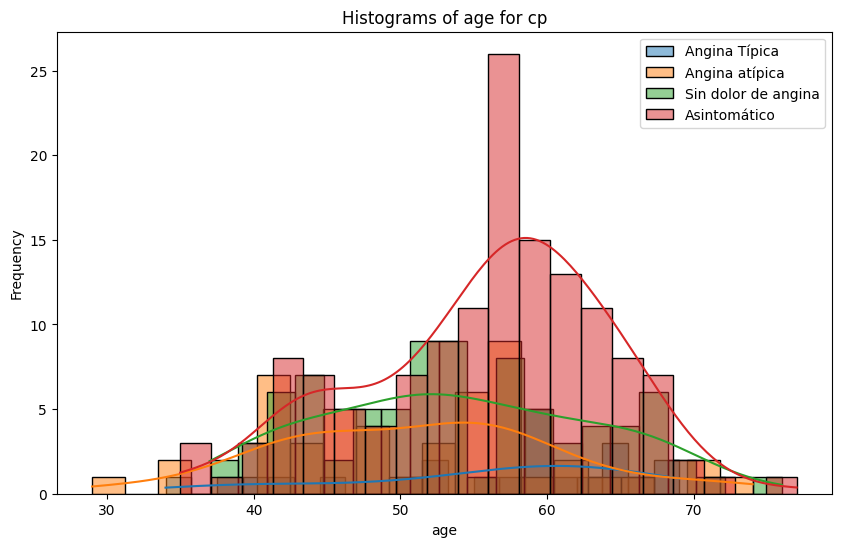

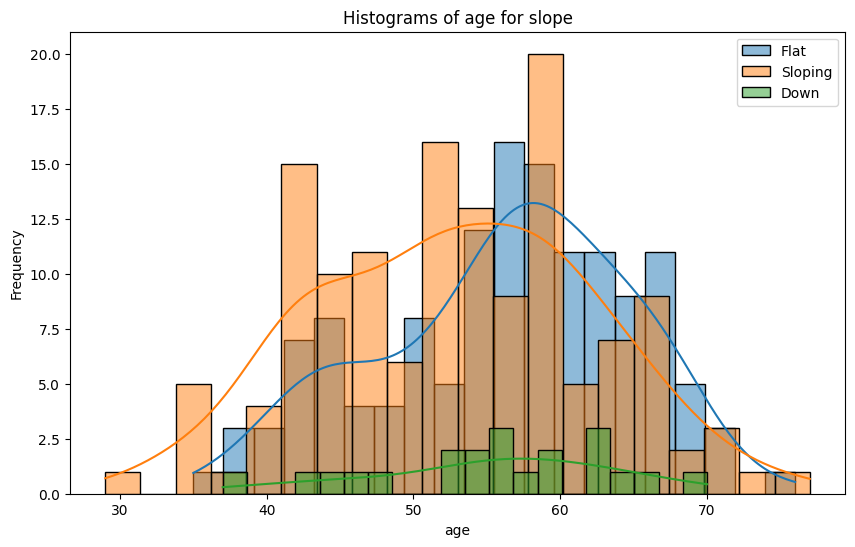

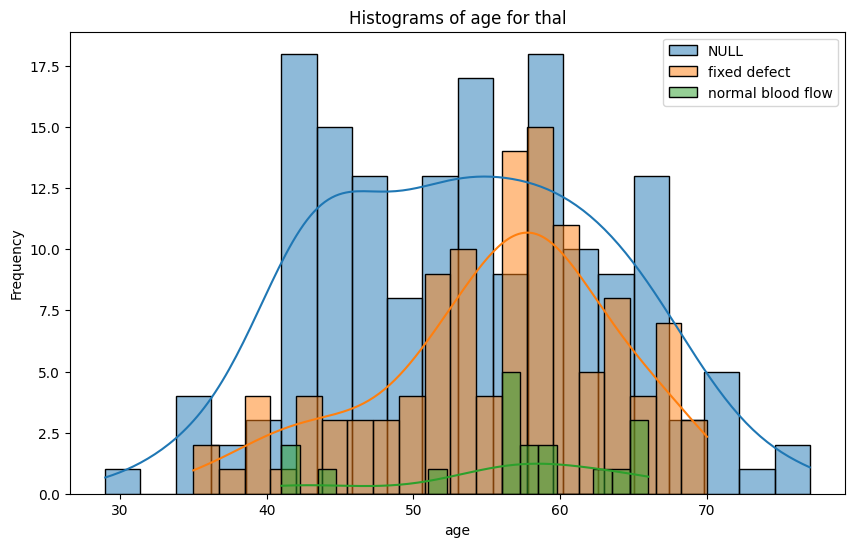

['cp', 'slope']

In [15]:
ml.plot_features_cat_regression(df, target_col="age", with_individual_plot=True)